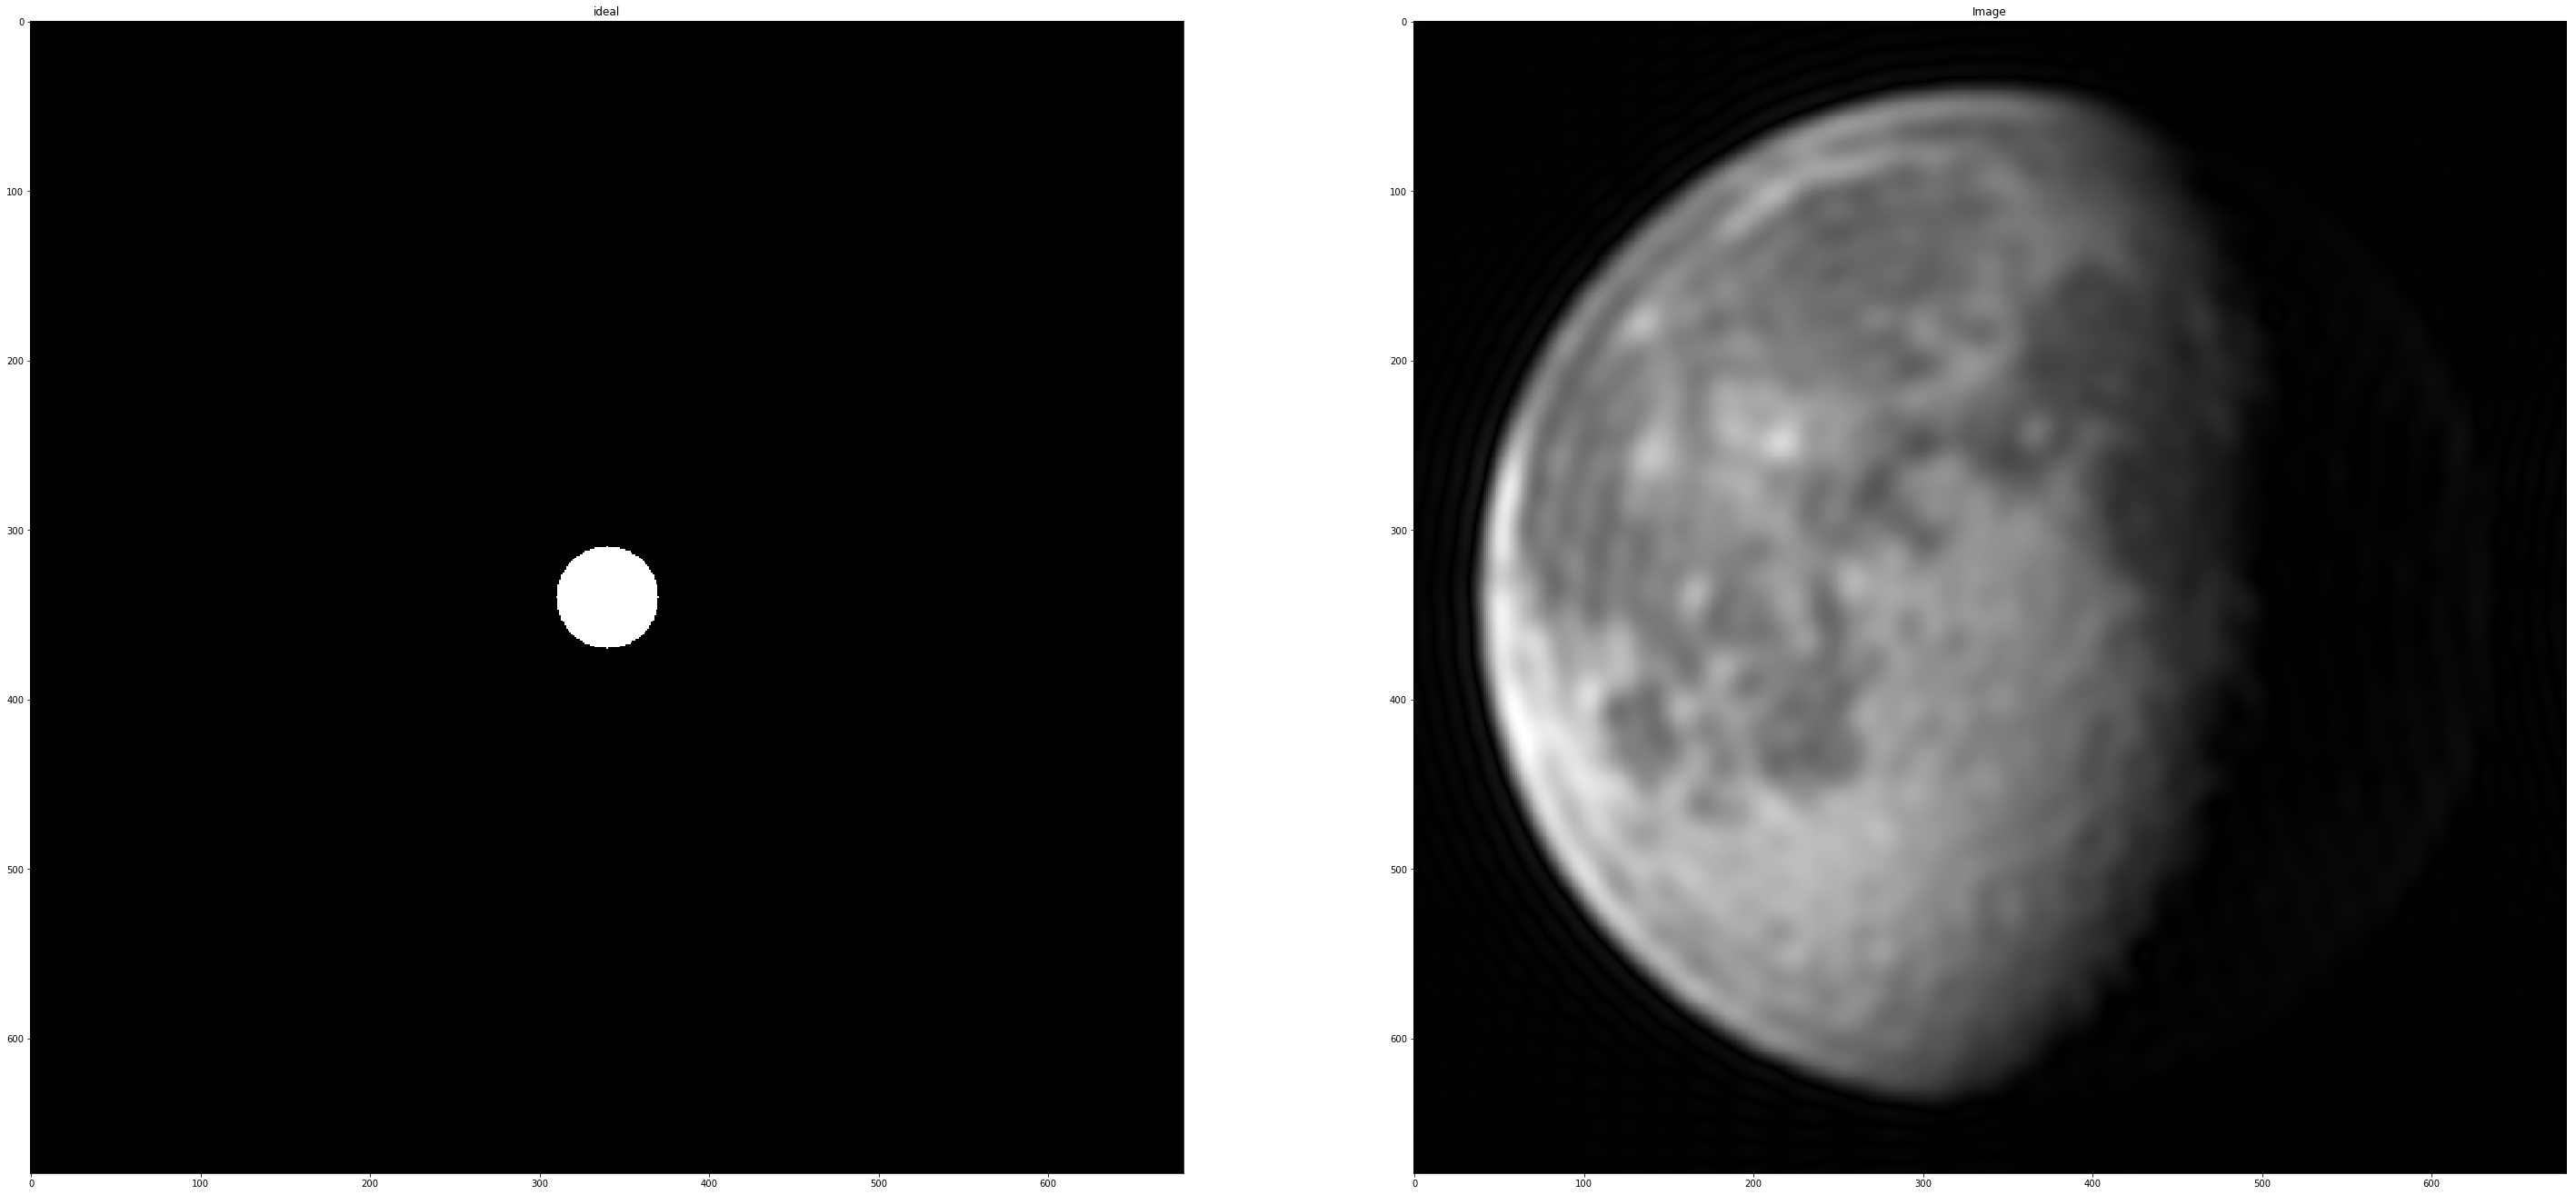

In [4]:
#ideal
import cv2
import numpy as np
from matplotlib import pyplot as plt
import numpy, math
import scipy.fftpack as fftim

img = cv2.imread('moon.png',0)
fig_size = plt.rcParams["figure.figsize"]

c = np.fft.fft2(img)
f = np.fft.fftshift(c)

M = img.shape[0]
N = img.shape[1]
center1 = M/2
center2 = N/2
d = 30

ideal = np.zeros((M,N))
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        r = math.sqrt(r1)
        if r <= d:
            ideal[i,j] = 1
            

Multply = ideal * f  
imageideal = abs(fftim.ifft2(Multply))

plt.subplot(121),plt.imshow(ideal,cmap='gray'),plt.title('ideal')

plt.subplot(122),plt.imshow(imageideal,cmap='gray'),plt.title('Image')

fig_size[0] = 50
fig_size[1] = 50
plt.rcParams["figure.figsize"] = fig_size
plt.show()

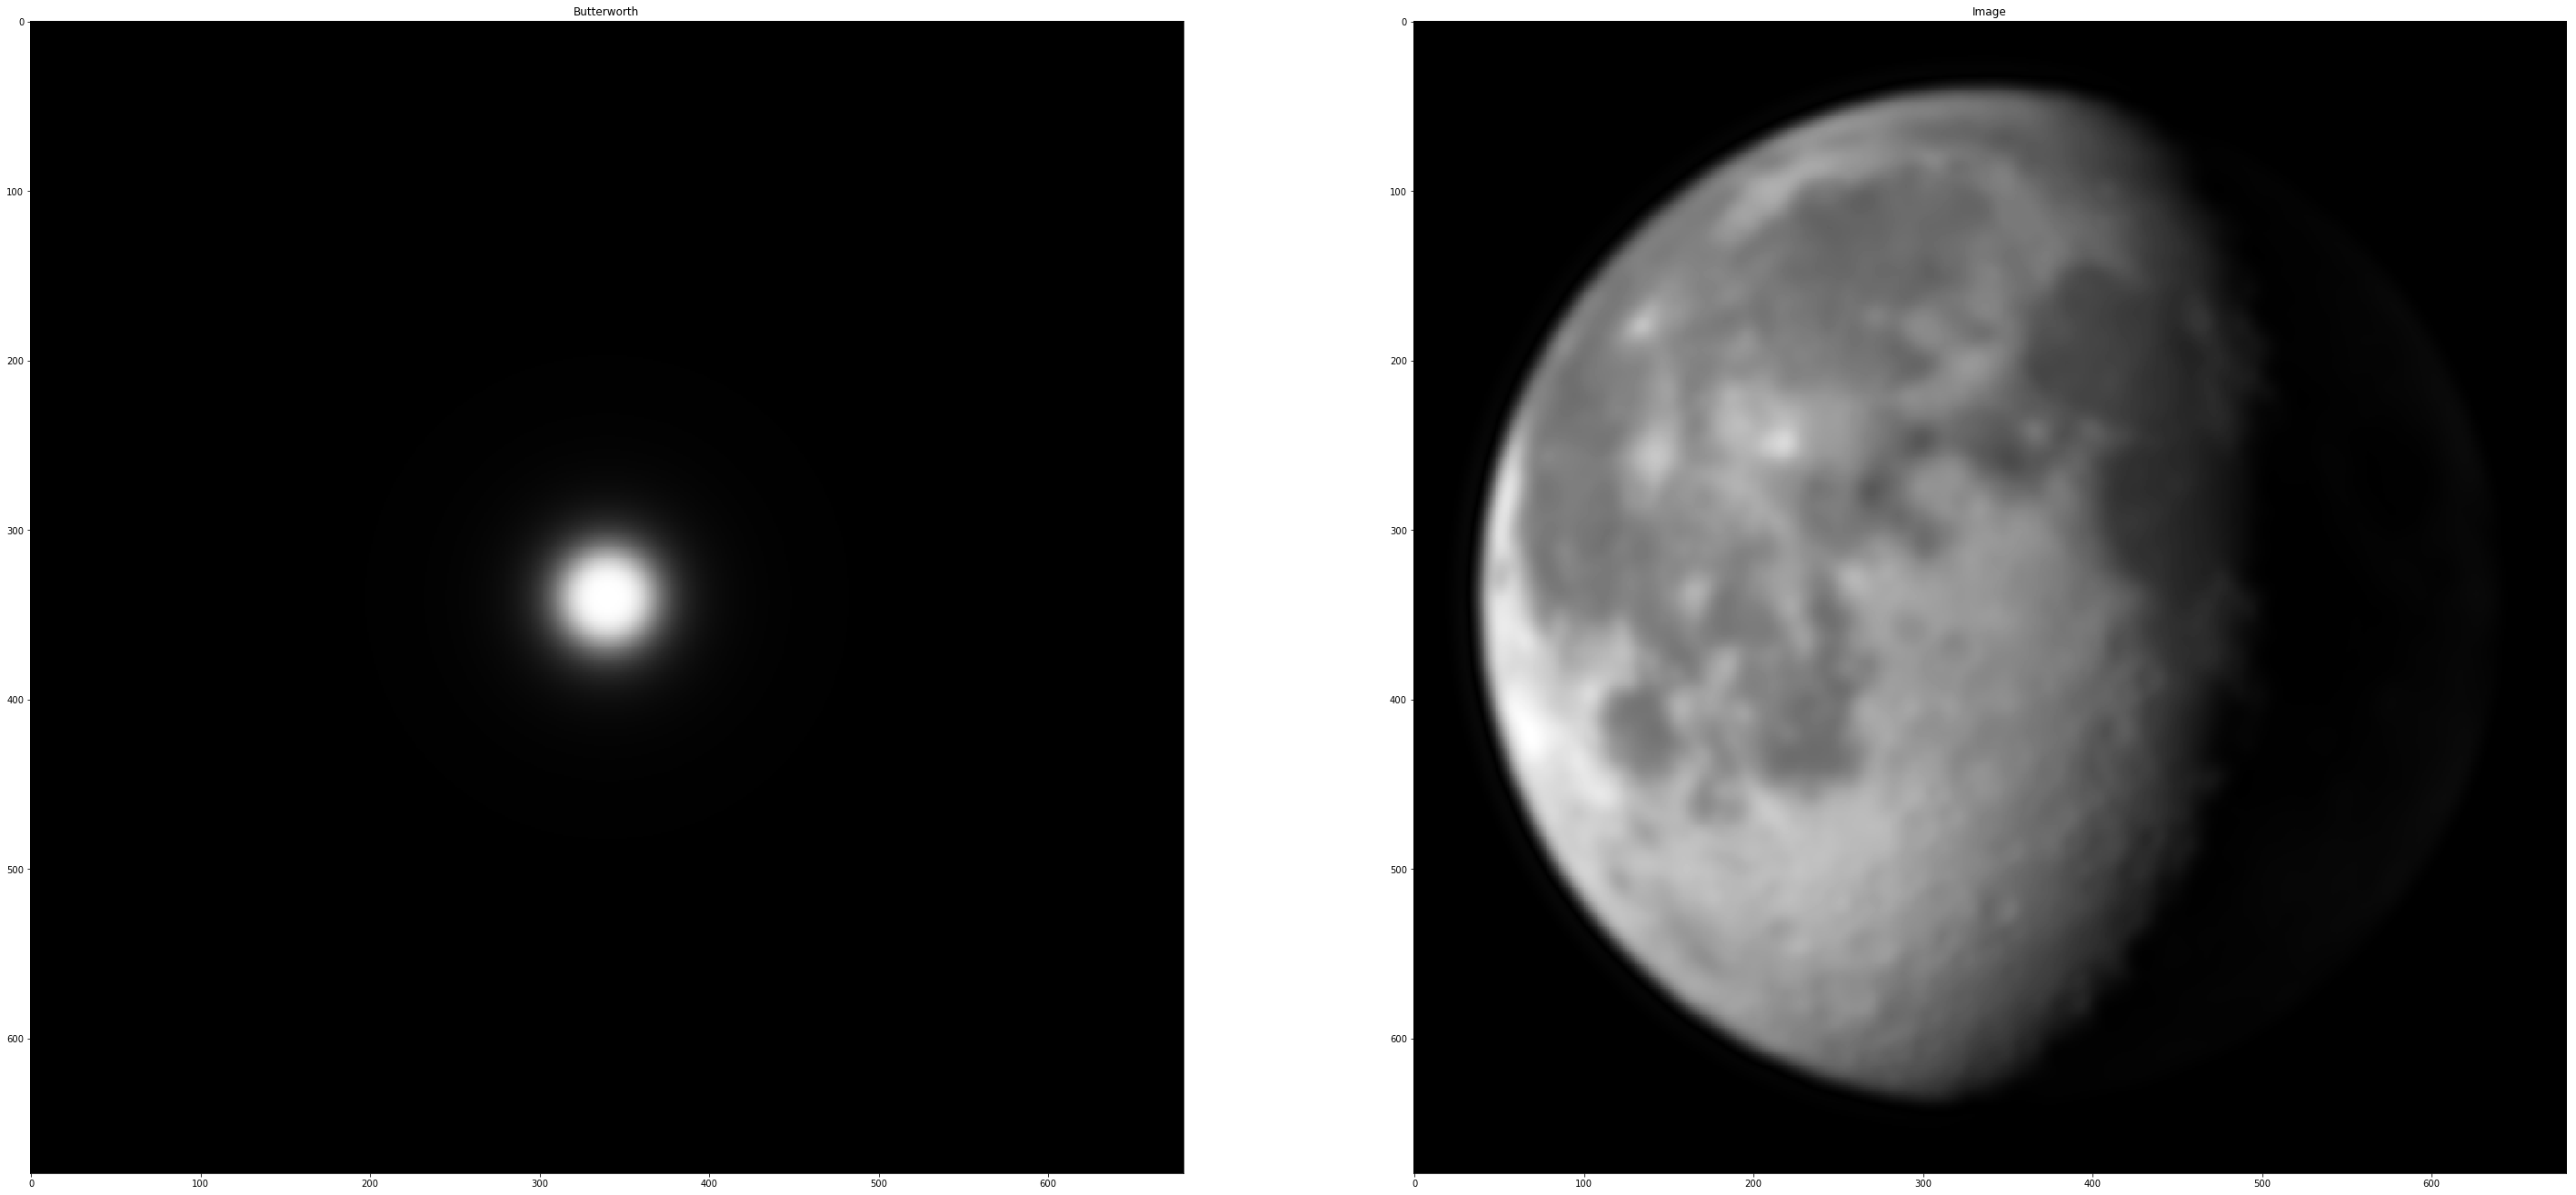

In [3]:
#Butterworth
import cv2
import numpy as np
from matplotlib import pyplot as plt
import numpy, math
import scipy.misc
import scipy.fftpack as fftim


img = cv2.imread('moon.png',0)
fig_size = plt.rcParams["figure.figsize"]

c = np.fft.fft2(img)
f = np.fft.fftshift(c)

M = img.shape[0]
N = img.shape[1]
center1 = M/2
center2 = N/2
d = 30

Butterworth = np.zeros((M,N))
t = 2*2
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        r = math.sqrt(r1)
        
        Butterworth[i,j] = 1/(1 + (r/d)**t)

Butterworth = scipy.misc.toimage(Butterworth)
Multply = f * Butterworth 
ButterworthImg = abs(fftim.ifft2(Multply))


plt.subplot(121),plt.imshow(Butterworth,cmap='gray'),plt.title('Butterworth')

plt.subplot(122),plt.imshow(ButterworthImg,cmap='gray'),plt.title('Image')

fig_size[0] = 50
fig_size[1] = 50
plt.rcParams["figure.figsize"] = fig_size
plt.show()

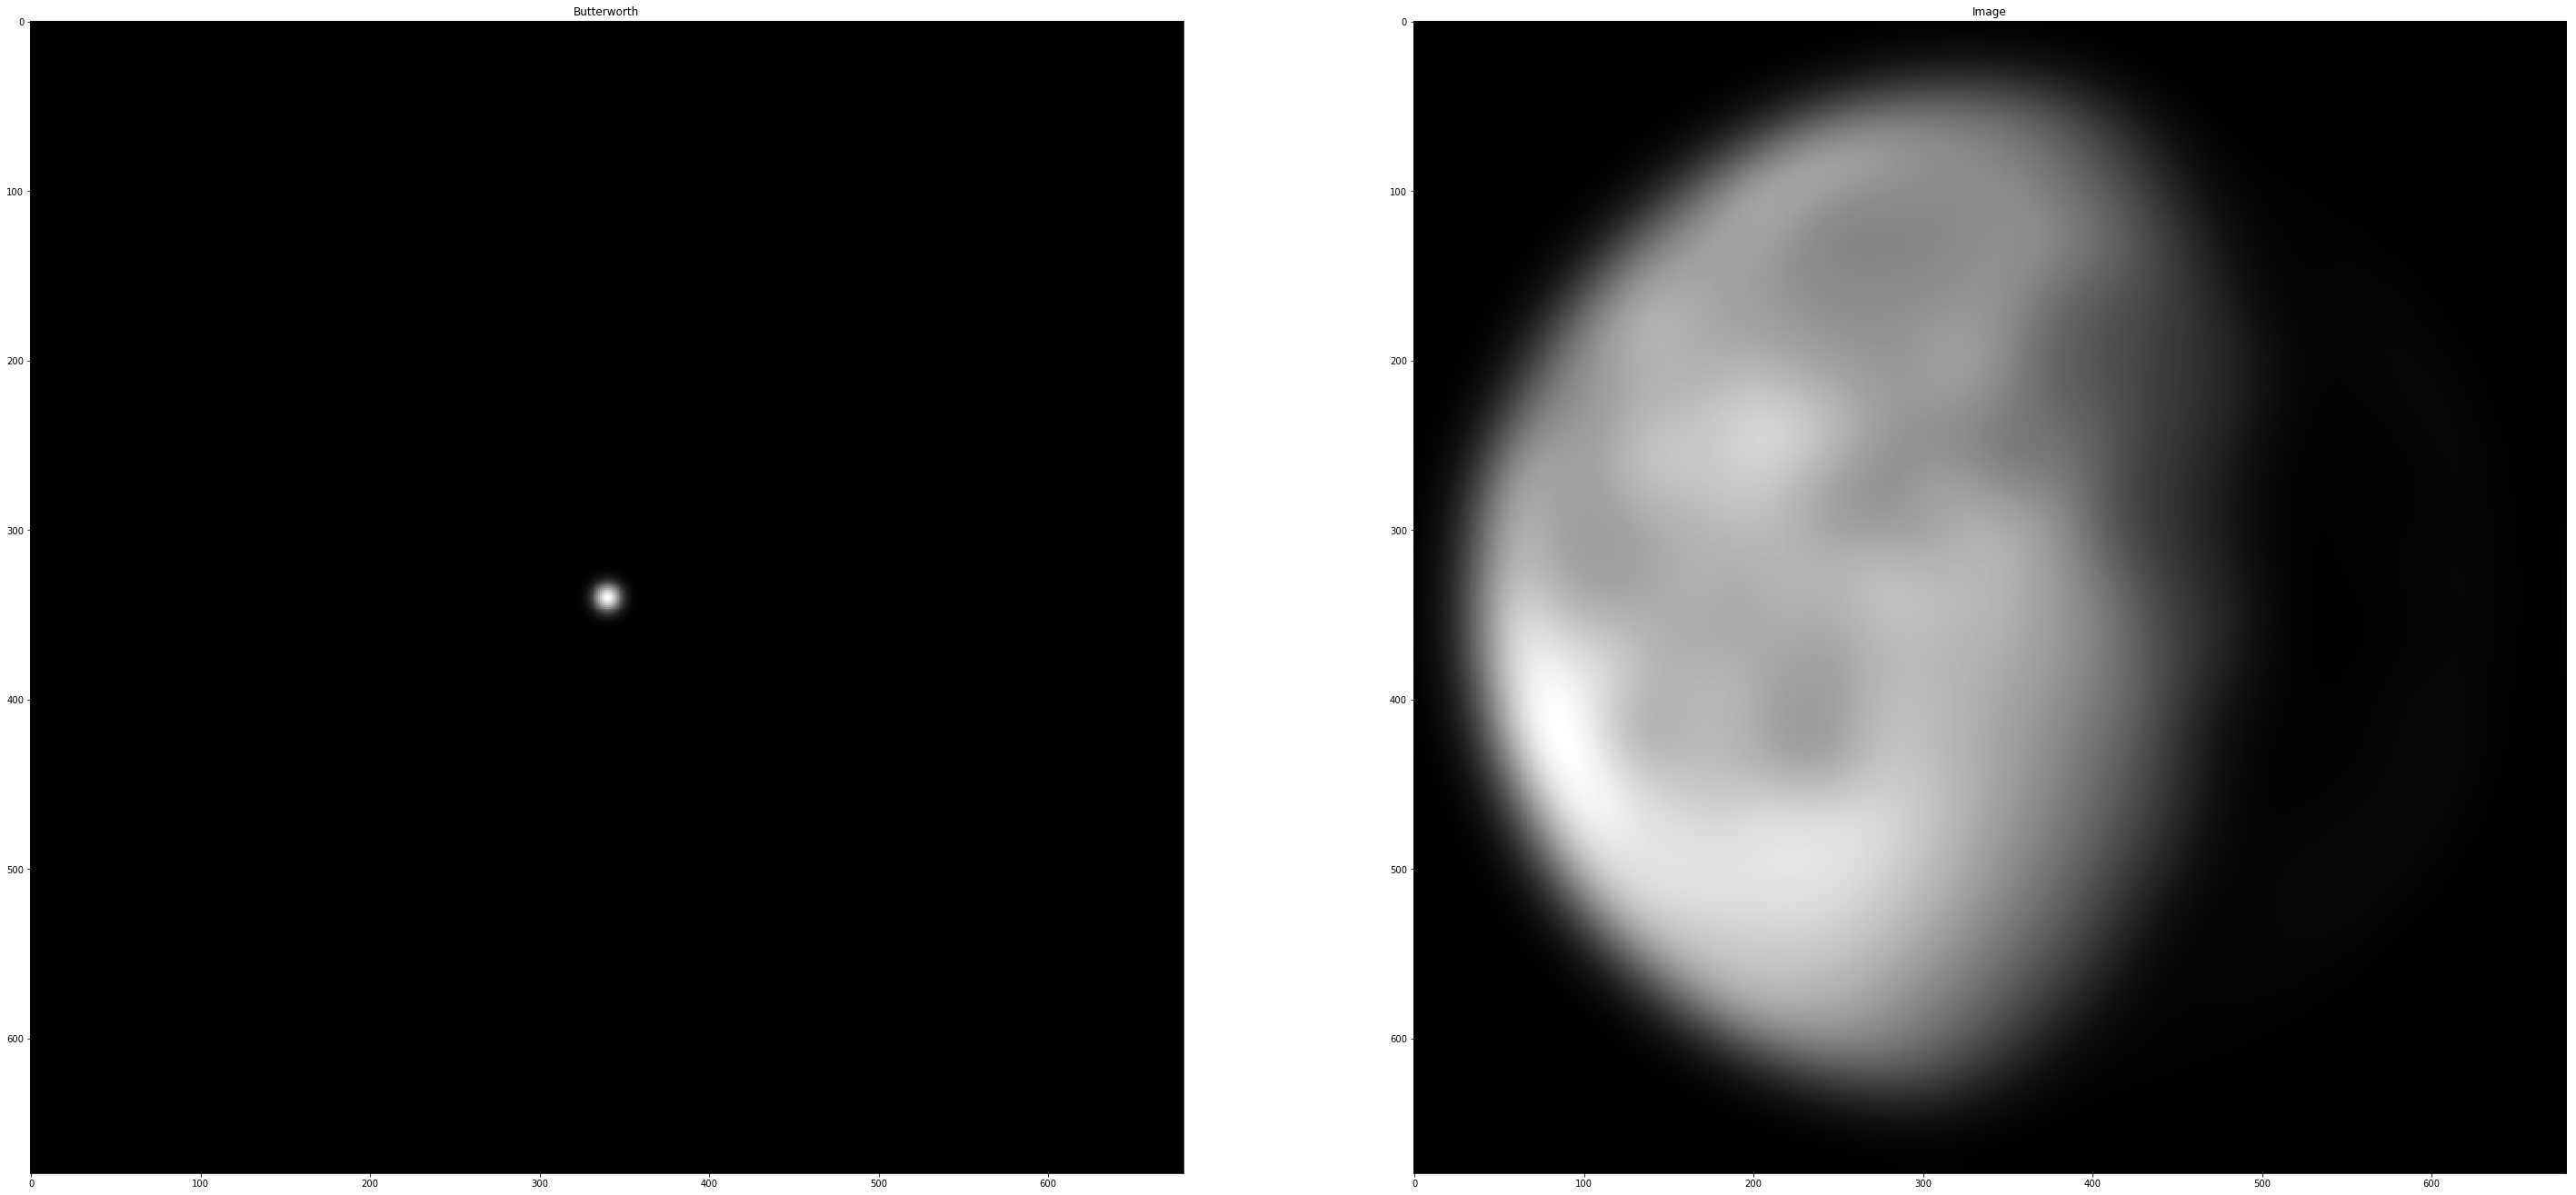

In [2]:
#Gassuian
import cv2
import numpy as np
from matplotlib import pyplot as plt
import numpy, math
import scipy.misc
import scipy.fftpack as fftim


img = cv2.imread('moon.png',0)
fig_size = plt.rcParams["figure.figsize"]

c = np.fft.fft2(img)
f = np.fft.fftshift(c)

M = img.shape[0]
N = img.shape[1]
center1 = M/2
center2 = N/2


Gassuian = np.zeros((M,N))
d = 20 
t1 = 2*4

for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        r = math.sqrt(r1)
        
        Gassuian[i,j] = math.exp(-r**2/t1**2)

Gassuian = scipy.misc.toimage(Gassuian)
Multply = f * Gassuian
GassuianImg = abs(fftim.ifft2(Multply))



plt.subplot(121),plt.imshow(Gassuian,cmap='gray'),plt.title('Butterworth')

plt.subplot(122),plt.imshow(GassuianImg,cmap='gray'),plt.title('Image')

fig_size[0] = 50
fig_size[1] = 50
plt.rcParams["figure.figsize"] = fig_size
plt.show()